In [1]:
import numpy as np
import networkLibraries as netlib
import errorFunctions as errfun
import activationFunctions as actfun
import datasets as ds
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Costruzione path
current_path = os.getcwd()
data_path = os.path.join(current_path, 'Data')
train_file_path = os.path.join(data_path, "mnist_train.csv")
test_file_path = os.path.join(data_path, "mnist_test.csv")

In [3]:
#Lettura csv
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [4]:
#Ottenimento array per il training e il testing
train_array = np.array(train_data)
test_array = np.array(test_data)

In [5]:
#Estrapoliamo il numero di righe e di colonne di train e test
m, n = train_array.shape 
mtest, ntest = test_array.shape  

np.random.shuffle(train_array)  # Mescola casualmente i dati prima di suddividerli in set di sviluppo e training

In [6]:
Xval, Yval = ds.get_mnist_validation(train_array, n)
Xtrain, Ytrain = ds.get_mnist_training(train_array, n, m)
Xtest, Ytest = ds.get_mnist_testing(test_array, ntest, mtest)
print(Xtrain.shape, Ytrain.shape, Xval.shape, Yval.shape, Xtest.shape, Ytest.shape)

(784, 47999) (10, 47999) (784, 11999) (10, 11999) (784, 9999) (10, 9999)


In [7]:
#A neural network with just one hidden layer is created
NUM_HIDDEN_NEURONS=[50, 50, 50, 50, 50]
mia_net=netlib.new_network(Xtrain.shape[0],NUM_HIDDEN_NEURONS,Ytrain.shape[0])
#mylib.set_activation_function(mia_net, activation_function=myact.tanh, layer_type=1)
#mylib.set_activation_function(mia_net, activation_function=myact.relu, layer_type=1)
netlib.set_activation_function(mia_net, activation_function=actfun.leaky_relu, layer_type=1)

netlib.get_net_structure(mia_net,show=1)

AttributeError: module 'activationFunctions' has no attribute 'softmax'

In [ ]:
#A copy of the network is made, so one can restore the original neural network,
# if one wants
train_mia_net=netlib.duplicateNetwork(mia_net)
netlib.get_net_structure(train_mia_net,show=1)

num_hidden_layers:  5
input_size:  784
output_size:  10
neurons in hidden layers:
50
50
50
50
50
activation functions:
leaky_relu
leaky_relu
leaky_relu
leaky_relu
leaky_relu
identity


In [ ]:

#batch training
err,errV=netlib.trainingPhase(train_mia_net,Xtrain,Ytrain,Xval,Yval,maxNumEpoches=150,errFun= errfun.crossEntropyMCSoftMax,eta=0.00001)

Epoch: 0 Train Err: 110522.9206995718 Train Accuracy: 0.09937707035563241 Val Err: 27628.937570312373 Val Accuracy: 0.0990082506875573


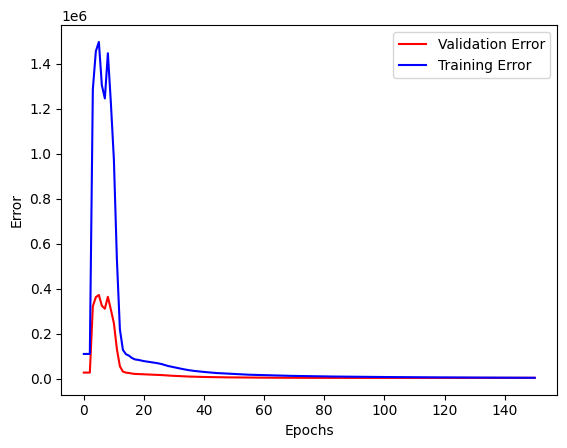

In [ ]:
plt.figure()
plt.plot(errV, 'r', label='Validation Error')
plt.plot(err, 'b', label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
#Accuracy on both the training and test set
acc=netlib.netAccuracy(train_mia_net,Xtest,Ytest)
print('test accuracy: ',acc)
acc=netlib.netAccuracy(train_mia_net,Xtrain,Ytrain)
print('train accuracy: ',acc)

test accuracy:  0.9246924692469247
train accuracy:  0.9588533094439468


Prediction:  [[ 35.85688156]
 [  5.92782912]
 [ 92.00759299]
 [-51.55757036]
 [ 90.79409355]
 [-65.55696688]
 [107.46803713]
 [  3.30569004]
 [-43.0953686 ]
 [ -7.77422655]]
Label:  [0 0 0 ... 0 0 0]


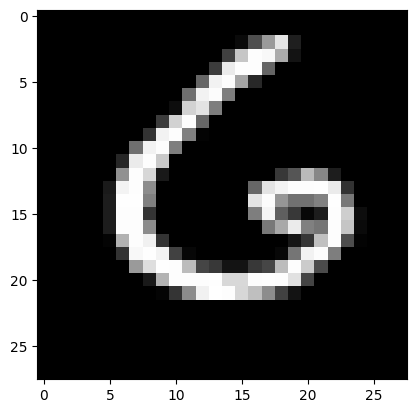

In [ ]:
#netlib.test_prediction(0, train_mia_net, Xtrain, Ytrain)